In [20]:
import matplotlib.pyplot as plt
import xarray as xr

from aospy import Proj, Model, Run, Var, Region, Calc, CalcInterface
xr.set_options(display_width=40)
%matplotlib inline

Define example aospy objects
----------------------------

In [11]:
def total_precipitation(convection_rain, condensation_rain):
    return convection_rain + condensation_rain

In [12]:
files = ['{:04d}0101.precip_monthly.nc'.format(year) for year in range(4, 7)]
example_run = Run(
    name='example_run',
    description=(
        'Control simulation of the idealized moist model'
    ),
    data_in_direc='../aospy/test/data/netcdf',
    data_in_dir_struc='one_dir',
    data_in_files={'monthly': {'condensation_rain': files,
                               'convection_rain': files}}
)

In [13]:
example_model = Model(
    name='example_model',
    grid_file_paths=(
        '../aospy/test/data/netcdf/00040101.precip_monthly.nc',
        '../aospy/test/data/netcdf/im.landmask.nc'
    ),
    runs=[example_run]
)

In [14]:
example_proj = Proj(
    'example_proj',
    direc_out='example-output',
    tar_direc_out='example-tar-output',
    models=(example_model,)
)

Initializing Project instance: example_proj (Wed Nov  2 11:13:11 2016)


In [15]:
condensation_rain = Var(
    name='condensation_rain',
    alt_names=('prec_ls',),
    def_time=True,
    description=('condensation rain'),
)

convection_rain = Var(
    name='convection_rain',
    alt_names=('prec_conv',),
    def_time=True,
    description=('convection rain'),
)

precip = Var(
    name='total_precipitation',
    def_time=True,
    description=('total precipitation rate'),
    func=total_precipitation,
    variables=(convection_rain, condensation_rain)
)

In [16]:
globe = Region(
    name='globe',
    description='Entire globe',
    lat_bounds=(-90, 90),
    lon_bounds=(0, 360),
    do_land_mask=False
)

Compute annual mean total precipitation rate
----------------------------------------------

In [17]:
calc_int = CalcInterface(
    proj=example_proj,
    model=example_model,
    run=example_run,
    var=precip,
    date_range=('0004-01-01', '0006-12-31'),
    intvl_in='monthly',
    dtype_in_time='ts',
    intvl_out='ann',
    dtype_out_time='av'
)
Calc(calc_int).compute()

In [18]:
ds = xr.open_dataset(calc_int.path_out['av'])

In [21]:
ds

<xarray.Dataset>
Dimensions:              (lat: 64, lon: 128)
Coordinates:
  * lon                  (lon) float64 0.0 ...
    land_mask            (lat, lon) float64 0.0 ...
    sfc_area             (lat, lon) float64 3.553e+09 ...
  * lat                  (lat) float64 -87.86 ...
Data variables:
    total_precipitation  (lat, lon) float64 5.158e-06 ...

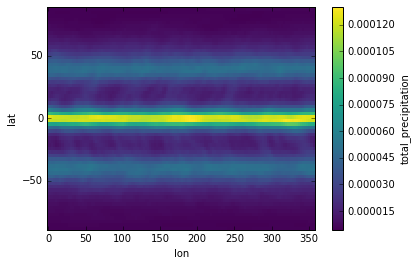

In [10]:
ds.total_precipitation.plot()

In [11]:
# The path to the output in this example is given by
calc_int.path_out['av']

'example-output/example_proj/example_model/example_run/total_precipitation/total_precipitation.ann.av.from_monthly_ts.example_model.example_run.0004-0006.nc'

Compute global annual mean total precipitation rate
---------------------------------------------------

In [12]:
calc_int = CalcInterface(
    proj=example_proj,
    model=example_model,
    run=example_run,
    var=precip,
    date_range=('0004-01-01', '0006-12-31'),
    intvl_in='monthly',
    dtype_in_time='ts',
    intvl_out='ann',
    dtype_out_time='reg.av',
    region={'globe': globe}
)
Calc(calc_int).compute()

In [13]:
calc_int.path_out['reg.av']

'example-output/example_proj/example_model/example_run/total_precipitation/total_precipitation.ann.reg.av.from_monthly_ts.example_model.example_run.0004-0006.nc'

In [14]:
ds = xr.open_dataset(calc_int.path_out['reg.av'])

In [ ]:
ds

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    globe    float64 3.501e-05